# Proyecto de graduaci√≥n - Telecom

## Descripci√≥n 
El operador de telecomunicaciones "Nizugorazyva com" quiere aprender a predecir la salida de clientes. Si resulta que el usuario est√° planeando irse, se ofrecer√°n c√≥digos promocionales y condiciones especiales. El equipo del operador recopil√≥ datos personales sobre algunos clientes, informaci√≥n sobre sus tarifas y contratos.

#### Descripci√≥n de los servicios

El operador ofrece dos tipos principales de servicios:
1. Comunicaci√≥n telef√≥nica fija. Es posible conectar el tel√©fono a varias l√≠neas simult√°neamente.
2. Internet. La conexi√≥n puede ser de dos tipos: l√≠nea telef√≥nica (DSL*,* del Ing. *l√≠nea de abonado digital*, "l√≠nea de abonado digital") o cable de fibra √≥ptica (*fibra √≥ptica*).  

Los siguientes servicios tambi√©n est√°n disponibles:

- seguridad en Internet: antivirus (*DeviceProtection*) y bloqueo de sitios inseguros (*OnlineSecurity*);
- l√≠nea de asistencia t√©cnica especializada (*TechSupport*);
- almacenamiento en la nube para copias de seguridad de datos (*OnlineBackup*);
- Streaming de televisi√≥n (*StreamingTV*) y cat√°logo de pel√≠culas (*StreamingMovies*).

Los clientes pueden pagar por los servicios cada mes o celebrar un contrato por 1-2 a√±os. Existen varios m√©todos de c√°lculo y la posibilidad de obtener un control electr√≥nico.

### Puntos de dolor del cliente

El cliente ha refinado sus m√©tricas de negocio y dolores. Estas son p√©rdidas debidas a promociones ineficientes con promociones, descuentos y otros incentivos. Las empresas de marketing identifican dos puntos de presi√≥n:
1) al usuario se le ofrecieron c√≥digos promocionales, pero no se iba a ir (ejemplo cl√°sico de Falso Positivo en nuestro idioma);  
2) Al usuario no se le ofreci√≥ nada y se fue (como dicen, Falso Negativo).  
Adem√°s de ROC-AUC, el cliente quiere una m√©trica interpretable para que la administraci√≥n pueda entender el informe. Es por eso que utilizamos ROC-AUC para nosotros (F-medida adem√°s), y para el cliente en la muestra de prueba que necesita para ver la matriz de precisi√≥n y error para un informe convincente m√°s tarde.

### Data

[contract_new.csv](https://code.s3.yandex.net/datasets/contract_new.csv)  
[personal_new.csv](https://code.s3.yandex.net/datasets/personal_new.csv)  
[internet_new.csv](https://code.s3.yandex.net/datasets/internet_new.csv)  
[phone_new.csv](https://code.s3.yandex.net/datasets/phone_new.csv)  

### Descripci√≥n de los datos

Los datos consisten en archivos de diferentes fuentes:

- contrato nuevo - informaci√≥n sobre el contrato;
- [personal_new.csv‚Ç¨. - datos personales del cliente;
- informaci√≥n sobre los servicios de Internet;
- Informaci√≥n sobre los servicios de telefon√≠a.

En todos los archivos, la columna ÀêcustomerID! contiene el c√≥digo del cliente.

La informaci√≥n sobre los tratados es actual el 1 de febrero de 2020.

El cliente ya ha proporcionado los datos y su descripci√≥n. Aqu√≠ hay algunos detalles de la carta de presentaci√≥n:
- personal_new.csv - datos personales del cliente
    - g√©nero
    - SeniorCitizen - estado de la pensi√≥n de vejez
    - Pareja - Presencia del c√≥nyuge
    - Dependientes - Disponibilidad de Dependientes
- contract_new.csv - informaci√≥n del contrato
    - BeginDate - fecha de inicio del servicio
    - EndDate - fecha de finalizaci√≥n del servicio
    - Tipo - tipo de contrato: mensual, anual, etc
    - PaperlessBilling - Facturaci√≥n por correo electr√≥nico
    - PaymentMethod - m√©todo de pago
    - MonthlyCharges - gastos mensuales por servicios
    - TotalCharges - todo el dinero gastado en servicios
- internet_new.csv - informaci√≥n sobre los servicios de Internet
    - InternetService - disponibilidad de servicios de Internet
    - OnlineSecurity - Cortafuegos
    - OnlineBackup - Almacenamiento en la nube para la copia de seguridad de datos
    - DeviceProtection - antivirus
    - TechSupport - l√≠nea de asistencia t√©cnica especializada
    - StreamingTV - televisi√≥n en l√≠nea
- StreamingMovies - cine en l√≠nea
- phone_new.csv - informaci√≥n sobre los servicios de telefon√≠a
    - MultipleLines - la posibilidad de conectar un tel√©fono a varias l√≠neas al mismo tiempo

## Descarga y visualizaci√≥n de los datos

In [1]:
from catboost import CatBoostClassifier, Pool
from phik import phik_matrix
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import OrdinalEncoder, RobustScaler

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
contract = pd.read_csv('https://code.s3.yandex.net/datasets/contract_new.csv')
contract.head()

customerID   BeginDate EndDate            Type PaperlessBilling  \
0  7590-VHVEG  2020-01-01      No  Month-to-month              Yes   
1  5575-GNVDE  2017-04-01      No        One year               No   
2  3668-QPYBK  2019-10-01      No  Month-to-month              Yes   
3  7795-CFOCW  2016-05-01      No        One year               No   
4  9237-HQITU  2019-09-01      No  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges TotalCharges  
0           Electronic check           29.85        31.04  
1               Mailed check           56.95      2071.84  
2               Mailed check           53.85       226.17  
3  Bank transfer (automatic)           42.30       1960.6  
4           Electronic check           70.70        353.5

In [4]:
personal = pd.read_csv('https://code.s3.yandex.net/datasets/personal_new.csv')
personal.head()

customerID  gender  SeniorCitizen Partner Dependents
0  7590-VHVEG  Female              0     Yes         No
1  5575-GNVDE    Male              0      No         No
2  3668-QPYBK    Male              0      No         No
3  7795-CFOCW    Male              0      No         No
4  9237-HQITU  Female              0      No         No

In [5]:
internet = pd.read_csv('https://code.s3.yandex.net/datasets/internet_new.csv')
internet.head()

customerID InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0  7590-VHVEG             DSL             No          Yes               No   
1  5575-GNVDE             DSL            Yes           No              Yes   
2  3668-QPYBK             DSL            Yes          Yes               No   
3  7795-CFOCW             DSL            Yes           No              Yes   
4  9237-HQITU     Fiber optic             No           No               No   

  TechSupport StreamingTV StreamingMovies  
0          No          No              No  
1          No          No              No  
2          No          No              No  
3         Yes          No              No  
4          No          No              No

In [6]:
phone = pd.read_csv('https://code.s3.yandex.net/datasets/phone_new.csv')
phone.head()

customerID MultipleLines
0  5575-GNVDE            No
1  3668-QPYBK            No
2  9237-HQITU            No
3  9305-CDSKC           Yes
4  1452-KIOVK           Yes

In [7]:
# Combinar tablas en una sola
# Antes de agregar valores a las tablas de Internet y Tel√©fono para evitar perder datos, qui√©n us√≥ qu√© servicio

internet['Internet'] = 'Yes'
phone['Phone'] = 'Yes'

In [8]:
# Ahora fusionemos las tablas en un dato por el customerID de la columna

data = contract
data = pd.concat([data.set_index('customerID'), personal.set_index('customerID')], axis=1)
data = pd.concat([data, internet.set_index('customerID')], axis=1)
data = pd.concat([data, phone.set_index('customerID')], axis=1)

In [10]:
data.head(5).T

customerID              7590-VHVEG    5575-GNVDE      3668-QPYBK  \
BeginDate               2020-01-01    2017-04-01      2019-10-01   
EndDate                         No            No              No   
Type                Month-to-month      One year  Month-to-month   
PaperlessBilling               Yes            No             Yes   
PaymentMethod     Electronic check  Mailed check    Mailed check   
MonthlyCharges               29.85         56.95           53.85   
TotalCharges                 31.04       2071.84          226.17   
gender                      Female          Male            Male   
SeniorCitizen                    0             0               0   
Partner                        Yes            No              No   
Dependents                      No            No              No   
InternetService                DSL           DSL             DSL   
OnlineSecurity                  No           Yes             Yes   
OnlineBackup                   Yes            No             Yes   
DeviceProtection                No           Yes              No   
TechSupport                     No            No              No   
StreamingTV                     No            No              No   
StreamingMovies                 No            No              No   
Internet                       Yes           Yes             Yes   
MultipleLines                  NaN            No              No   
Phone                          NaN           Yes             Yes   

customerID                       7795-CFOCW        9237-HQITU  
BeginDate                        2016-05-01        2019-09-01  
EndDate                                  No                No  
Type                               One year    Month-to-month  
PaperlessBilling                         No               Yes  
PaymentMethod     Bank transfer (automatic)  Electronic check  
MonthlyCharges                         42.3              70.7  
TotalCharges                         1960.6             353.5  
gender                                 Male            Female  
SeniorCitizen                             0                 0  
Partner                                  No                No  
Dependents                               No                No  
InternetService                         DSL       Fiber optic  
OnlineSecurity                          Yes                No  
OnlineBackup                             No                No  
DeviceProtection                        Yes                No  
TechSupport                             Yes                No  
StreamingTV                              No                No  
StreamingMovies                          No                No  
Internet                                Yes               Yes  
MultipleLines                           NaN                No  
Phone                                   NaN               Yes

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BeginDate         7043 non-null   object 
 1   EndDate           7043 non-null   object 
 2   Type              7043 non-null   object 
 3   PaperlessBilling  7043 non-null   object 
 4   PaymentMethod     7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7043 non-null   object 
 7   gender            7043 non-null   object 
 8   SeniorCitizen     7043 non-null   int64  
 9   Partner           7043 non-null   object 
 10  Dependents        7043 non-null   object 
 11  InternetService   5517 non-null   object 
 12  OnlineSecurity    5517 non-null   object 
 13  OnlineBackup      5517 non-null   object 
 14  DeviceProtection  5517 non-null   object 
 15  TechSupport       5517 non-null   object 
 16  StreamingTV       5517 non-null 

### Cambiar los tipos de datos y rellenar las omisiones

In [12]:
# Cambiar los tipos de datos y llenar los vac√≠os cuando sea necesario:

data['BeginDate'] = pd.to_datetime(data['BeginDate']) # start date of the contract simply type

In [13]:
# La columna del pensionista se convertir√° al formato S√≠/No similar a otras columnas

data['SeniorCitizen'] = data['SeniorCitizen'].replace({1: 'Yes', 0: 'No'})

In [14]:
# Tambi√©n iremos con las columnas creadas anteriormente Internet y Tel√©fono. S√≠, ya hemos especificado, y todos los pases ser√°n reemplazados por No.

data['Internet'] = data['Internet'].fillna('No')
data['Phone'] = data['Phone'].fillna('No')

In [15]:
# Al intentar convertir una columna de TotalCharges a un tipo num√©rico, se produjo un error que no todos los valores son n√∫meros. 
# Al analizar, se encontr√≥ que el error es aplicable a los 11 valores que firmaron este mes, 
# y probablemente todav√≠a no han tenido tiempo de pagar por los servicios. Vamos a reemplazar sus valores con 0 y cambiar el tipo de datos.
data['TotalCharges'] = data['TotalCharges'].str.strip().replace('', float('nan')).fillna('0').astype(float)

In [16]:
# Queda por convertir la columna EndDate al tipo de fecha, pero podemos ver incluso desde los primeros cinco registros que tambi√©n contiene un valor
# No, i.e. el usuario contin√∫a usando los servicios. Primero cree la columna de destino, y establezca el valor a 1 all√≠,
# donde hay una fecha final para el contrato.

data['Gone'] = (data['EndDate'] != 'No').astype(bool)

In [17]:
# Ahora podemos cambiar el tipo de datos, pero los espacios en blanco se llenar√°n con la fecha de hoy

data['EndDate'] = data['EndDate'].where(data['EndDate'] != 'No', '2020-02-01')
data['EndDate'] = pd.to_datetime(data['EndDate'])

In [18]:
# Aseg√∫rese de que los tipos de datos son correctos en todas partes.

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   BeginDate         7043 non-null   datetime64[ns]
 1   EndDate           7043 non-null   datetime64[ns]
 2   Type              7043 non-null   object        
 3   PaperlessBilling  7043 non-null   object        
 4   PaymentMethod     7043 non-null   object        
 5   MonthlyCharges    7043 non-null   float64       
 6   TotalCharges      7043 non-null   float64       
 7   gender            7043 non-null   object        
 8   SeniorCitizen     7043 non-null   object        
 9   Partner           7043 non-null   object        
 10  Dependents        7043 non-null   object        
 11  InternetService   5517 non-null   object        
 12  OnlineSecurity    5517 non-null   object        
 13  OnlineBackup      5517 non-null   object        
 14  DeviceProtecti

In [19]:
# Vemos que las omisiones est√°n solo en las columnas relacionadas con los servicios telef√≥nicos o de Internet. Considerando que
# Tablas cliente combinadas de ambas direcciones, es l√≥gico que el servicio de Internet omita los clientes de telefon√≠a
# y viceversa. Rellenemos las omisiones con los valores No, porque estos servicios no son utilizados exactamente por los clientes

data = data.fillna('No')

### Examen de la distribuci√≥n de temas

In [20]:
# Mira c√≥mo se distribuyen los temas en todas las columnas de la tabla resultante

print('–ü–µ—Ä–≤—ã–π –∫–æ–Ω—Ç—Ä–∞–∫—Ç –∑–∞–∫–ª—é—á–µ–Ω: ', min(data['BeginDate']))
print('–ü–æ—Å–ª–µ–¥–Ω–∏–π –∫–æ–Ω—Ç—Ä–∞–∫—Ç –∑–∞–∫–ª—é—á–µ–Ω: ', max(data['BeginDate']))
print('–ü–µ—Ä–≤—ã–π –∫–æ–Ω—Ç—Ä–∞–∫—Ç —Ä–∞—Å—Ç–æ—Ä–≥–Ω—É—Ç: ', min(data['EndDate']))
print('–ü–æ—Å–ª–µ–¥–Ω–∏–π –∫–æ–Ω—Ç—Ä–∞–∫—Ç —Ä–∞—Å—Ç–æ—Ä–≥–Ω—É—Ç: ', max(data['EndDate']))

–ü–µ—Ä–≤—ã–π –∫–æ–Ω—Ç—Ä–∞–∫—Ç –∑–∞–∫–ª—é—á–µ–Ω:  2013-10-01 00:00:00
–ü–æ—Å–ª–µ–¥–Ω–∏–π –∫–æ–Ω—Ç—Ä–∞–∫—Ç –∑–∞–∫–ª—é—á–µ–Ω:  2020-02-01 00:00:00
–ü–µ—Ä–≤—ã–π –∫–æ–Ω—Ç—Ä–∞–∫—Ç —Ä–∞—Å—Ç–æ—Ä–≥–Ω—É—Ç:  2014-06-01 00:00:00
–ü–æ—Å–ª–µ–¥–Ω–∏–π –∫–æ–Ω—Ç—Ä–∞–∫—Ç —Ä–∞—Å—Ç–æ—Ä–≥–Ω—É—Ç:  2020-02-01 00:00:00


In [21]:
# Tenemos datos sobre los contratos desde octubre de 2013 hasta la actualidad (1 de febrero de 2020) - datos de 6,5 a√±os
# La terminaci√≥n no comenz√≥ antes del 1 de junio de 2014, i.e.. despu√©s de 8 meses.
# Por el bien del inter√©s, podemos especificar cu√°nto tiempo dur√≥ el primer cliente insatisfecho:

print(data[data['EndDate'] == '2014-06-01 00:00:00'])

            BeginDate    EndDate      Type PaperlessBilling  \
customerID                                                    
7014-ZZXAW 2014-03-01 2014-06-01  Two year              Yes   

                      PaymentMethod  MonthlyCharges  TotalCharges  gender  \
customerID                                                                  
7014-ZZXAW  Credit card (automatic)           24.25         77.84  Female   

           SeniorCitizen Partner  ... OnlineSecurity OnlineBackup  \
customerID                        ...                               
7014-ZZXAW            No     Yes  ...             No           No   

           DeviceProtection TechSupport StreamingTV StreamingMovies Internet  \
customerID                                                                     
7014-ZZXAW               No          No          No              No       No   

           MultipleLines Phone  Gone  
customerID                            
7014-ZZXAW           Yes   Yes  True  

[1 rows x 2

In [22]:
data[data['EndDate'] == '2014-06-01 00:00:00'].T

customerID                     7014-ZZXAW
BeginDate             2014-03-01 00:00:00
EndDate               2014-06-01 00:00:00
Type                             Two year
PaperlessBilling                      Yes
PaymentMethod     Credit card (automatic)
MonthlyCharges                      24.25
TotalCharges                        77.84
gender                             Female
SeniorCitizen                          No
Partner                               Yes
Dependents                             No
InternetService                        No
OnlineSecurity                         No
OnlineBackup                           No
DeviceProtection                       No
TechSupport                            No
StreamingTV                            No
StreamingMovies                        No
Internet                               No
MultipleLines                         Yes
Phone                                 Yes
Gone                                 True

In [23]:
# Vemos que comenz√≥ a usarse solo en marzo de 2014, es decir. dur√≥ solo 3 meses.
# A√±adir√≠a otra columna con los datos, cu√°ntos meses el cliente utiliza los servicios de la compa√±√≠a, 
# Adem√°s, ahora podemos hacerlo, porque a lo largo de la columna EndDate tenemos la fecha, los clientes actuales - hoy

data['Months'] = ((data['EndDate'] - data['BeginDate']) / np.timedelta64(1, 'M')).astype(int)

In [24]:
# Consulte la informaci√≥n estad√≠stica sobre los datos num√©ricos en el conjunto de datos recibidos utilizando el m√©todo describe:

data.describe()

# Ver la informaci√≥n sobre tarifas y pagos para todo el per√≠odo
# - precio mensual var√≠a de 18 a 118, valor promedio 64 
# total gastado de 0 (nuestros nuevos clientes) a 9221. Promedio 2215

# Por el n√∫mero de meses de uso el m√≠nimo esperado 0, el m√°ximo - 76 (comprobado por separado - es 3 clientes 
# utilizar los servicios desde el principio). En promedio - 29 meses (2,5 a√±os)

MonthlyCharges  TotalCharges       Months
count     7043.000000   7043.000000  7043.000000
mean        64.761692   2115.312885    29.326139
std         30.090047   2112.742814    22.375522
min         18.250000      0.000000     0.000000
25%         35.500000    436.750000     9.000000
50%         70.350000   1343.350000    25.000000
75%         89.850000   3236.690000    48.000000
max        118.750000   9221.380000    76.000000

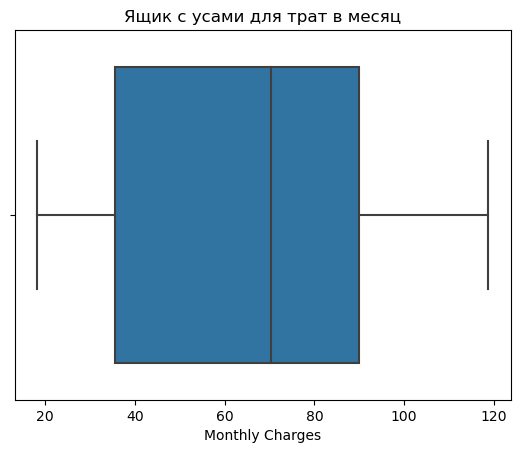

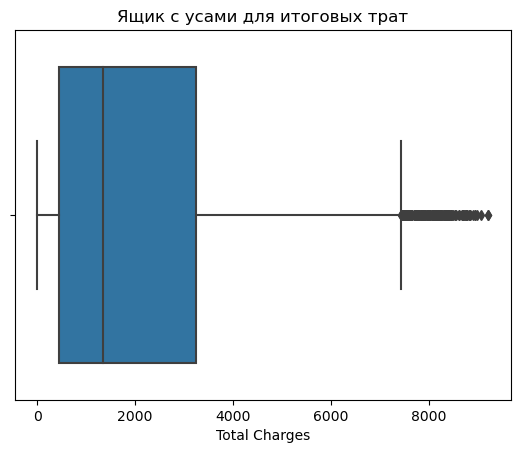

In [25]:
# Para los otros dos n√∫meros, construyamos cajas con bigotes:
# Caj√≥n de bigote para columna MonthlyCharges

sns.boxplot(data['MonthlyCharges'])
plt.xlabel('Monthly Charges')
plt.title('–Ø—â–∏–∫ —Å —É—Å–∞–º–∏ –¥–ª—è —Ç—Ä–∞—Ç –≤ –º–µ—Å—è—Ü')
plt.show()

# Caj√≥n con bigote para columna TotalCharges

sns.boxplot(data['TotalCharges'])
plt.xlabel('Total Charges')
plt.title('–Ø—â–∏–∫ —Å —É—Å–∞–º–∏ –¥–ª—è –∏—Ç–æ–≥–æ–≤—ã—Ö —Ç—Ä–∞—Ç')
plt.show()

In [26]:
# Vemos que la mayor√≠a de los clientes gastan de 35 a 89 al mes. No hay emisiones.
# De acuerdo con los costos totales del n√∫mero de 450 a 3300. Hay emisiones por encima de 8000, pero estos son los pocos clientes, 
# que han estado usando el servicio desde el principio.

In [27]:
# Examinaremos todos los dem√°s temas:
# Crear una funci√≥n para histogramas:

def plot_histogram(data, column, xlabel='', ylabel='–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ', title=''):
    sns.countplot(data=data, x=column)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.title(title)
    plt.show()

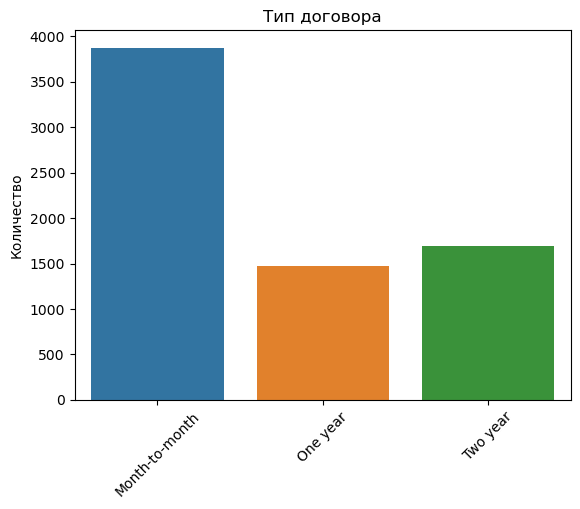

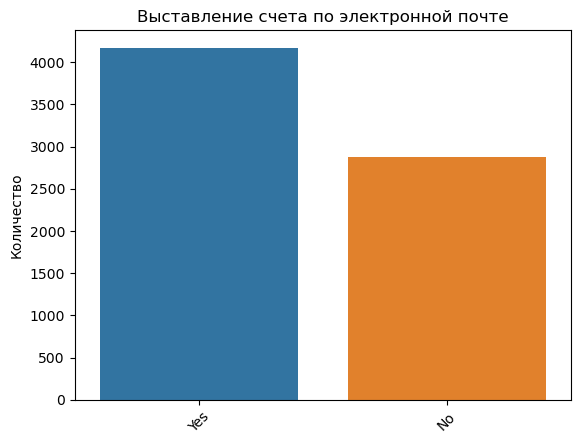

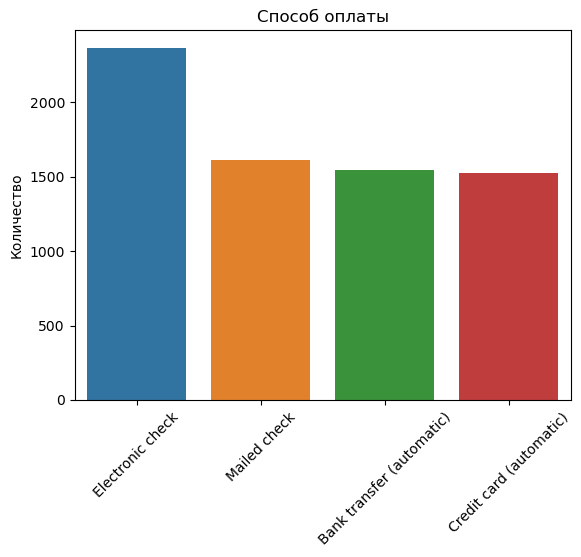

In [28]:
# Funciones de llamada para cada funci√≥n Contract

plot_histogram(data=data, column='Type', title='–¢–∏–ø –¥–æ–≥–æ–≤–æ—Ä–∞')
plot_histogram(data=data, column='PaperlessBilling', title='–í—ã—Å—Ç–∞–≤–ª–µ–Ω–∏–µ —Å—á–µ—Ç–∞ –ø–æ —ç–ª–µ–∫—Ç—Ä–æ–Ω–Ω–æ–π –ø–æ—á—Ç–µ')
plot_histogram(data=data, column='PaymentMethod', title='–°–ø–æ—Å–æ–± –æ–ø–ª–∞—Ç—ã', xlabel='')

Vemos que entre los tipos de contrato predomina el pago mensual, la cuenta recibe un poco m√°s por correo electr√≥nico, y el m√©todo de pago m√°s popular es un cheque electr√≥nico, los otros tres se distribuyen aproximadamente por igual.

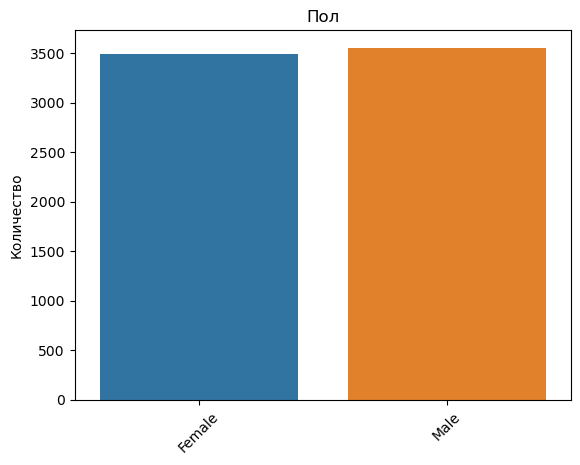

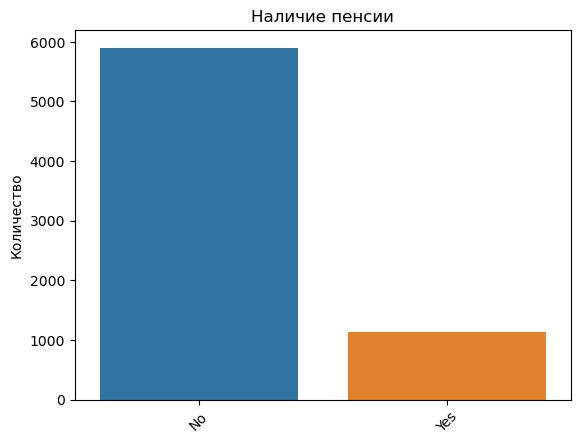

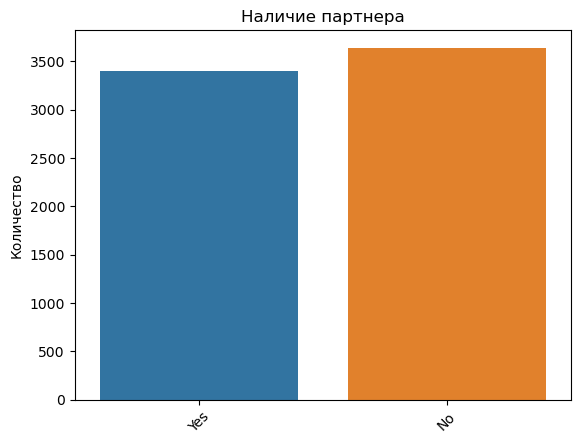

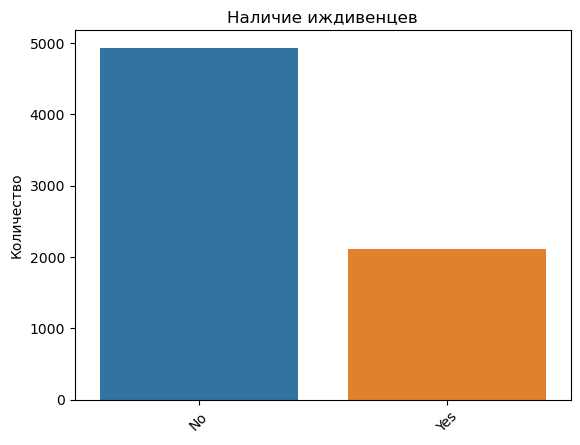

In [29]:
# Llamada de funci√≥n para cada bloque de caracter√≠sticas personales
plot_histogram(data=data, column='gender', title='–ü–æ–ª')
plot_histogram(data=data, column='SeniorCitizen', title='–ù–∞–ª–∏—á–∏–µ –ø–µ–Ω—Å–∏–∏')
plot_histogram(data=data, column='Partner', title='–ù–∞–ª–∏—á–∏–µ –ø–∞—Ä—Ç–Ω–µ—Ä–∞')
plot_histogram(data=data, column='Dependents', title='–ù–∞–ª–∏—á–∏–µ –∏–∂–¥–∏–≤–µ–Ω—Ü–µ–≤')

Los clientes se dividen aproximadamente por igual por sexo y pareja.   
Jubilados - peque√±a proporci√≥n (aproximadamente 1/7), tambi√©n con aproximadamente 2/7 dependientes

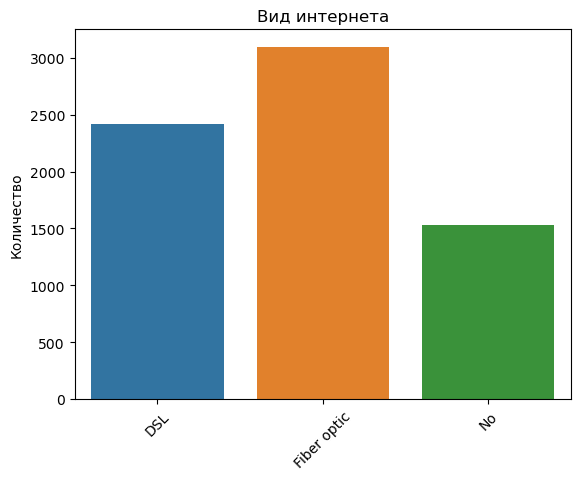

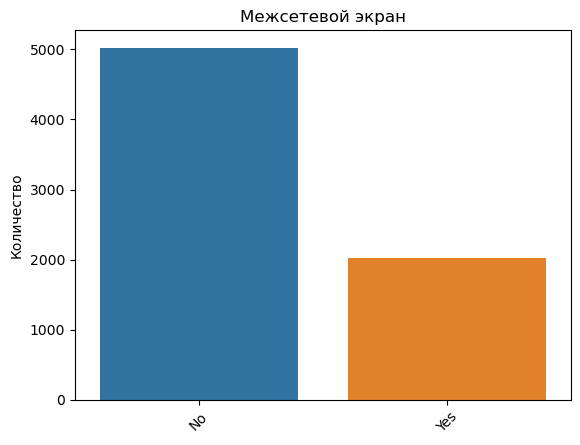

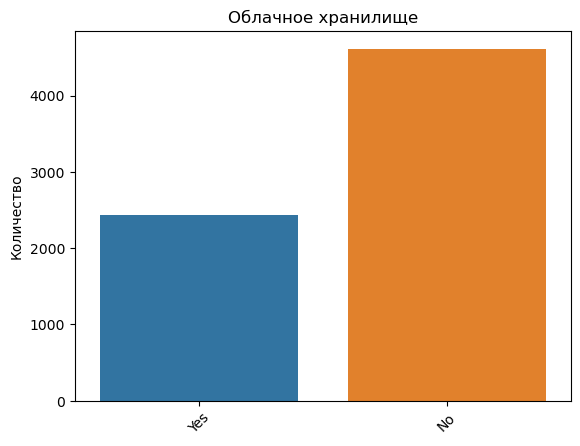

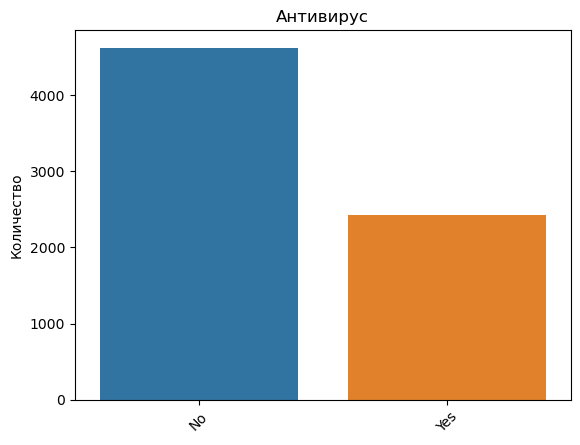

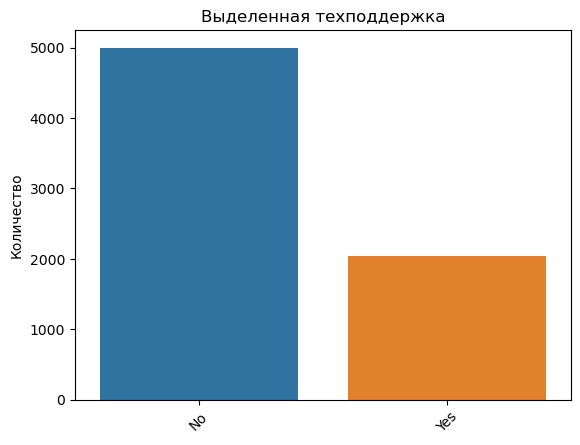

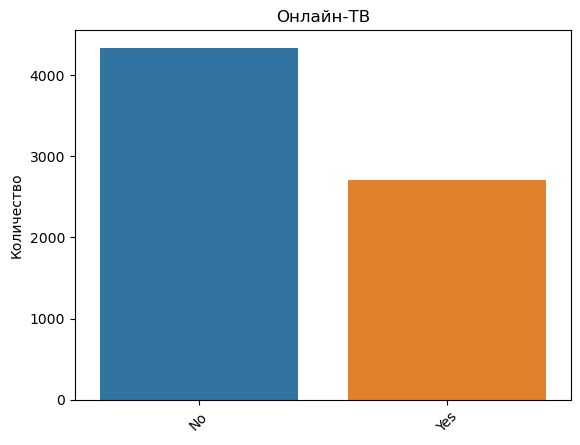

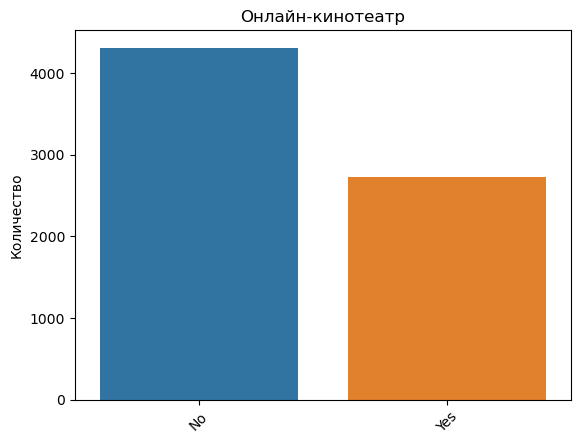

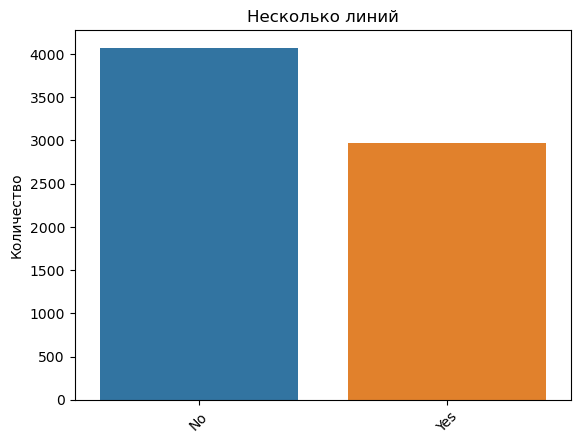

In [30]:
# Funci√≥n de llamada para cada funci√≥n de bloqueo de Internet y tel√©fono
plot_histogram(data=data, column='InternetService', title='–í–∏–¥ –∏–Ω—Ç–µ—Ä–Ω–µ—Ç–∞')
plot_histogram(data=data, column='OnlineSecurity', title='–ú–µ–∂—Å–µ—Ç–µ–≤–æ–π —ç–∫—Ä–∞–Ω')
plot_histogram(data=data, column='OnlineBackup', title='–û–±–ª–∞—á–Ω–æ–µ —Ö—Ä–∞–Ω–∏–ª–∏—â–µ')
plot_histogram(data=data, column='DeviceProtection', title='–ê–Ω—Ç–∏–≤–∏—Ä—É—Å')
plot_histogram(data=data, column='TechSupport', title='–í—ã–¥–µ–ª–µ–Ω–Ω–∞—è —Ç–µ—Ö–ø–æ–¥–¥–µ—Ä–∂–∫–∞')
plot_histogram(data=data, column='StreamingTV', title='–û–Ω–ª–∞–π–Ω-–¢–í')
plot_histogram(data=data, column='StreamingMovies', title='–û–Ω–ª–∞–π–Ω-–∫–∏–Ω–æ—Ç–µ–∞—Ç—Ä')
plot_histogram(data=data, column='MultipleLines', title='–ù–µ—Å–∫–æ–ª—å–∫–æ –ª–∏–Ω–∏–π')

Vemos que en el uso principal de servicios adicionales no es muy activo.   
Entre los usuarios de Internet, la fibra √≥ptica gana ligeramente. Para otros servicios, conectan a unos 2/7 clientes.

### Distribuci√≥n de temas entre los difuntos y los restantes

In [31]:
# Para el estudio de los patrones entre los que se han ido y comparaciones con los que se han quedado, separemos dos datacets

gone_data = data[data.Gone == 1]
remaining_data = data[data.Gone != 1]

In [32]:
# Haga una funci√≥n para histogramas comparativos:

def plot_histogram_comparison(data1, data2, labels, title):
    plt.hist([data1, data2], label=labels, density=True)
    plt.legend()
    plt.title(title)
    plt.xticks(rotation=45)
    plt.xlabel('')
    plt.ylabel('–°–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ')
    plt.show()

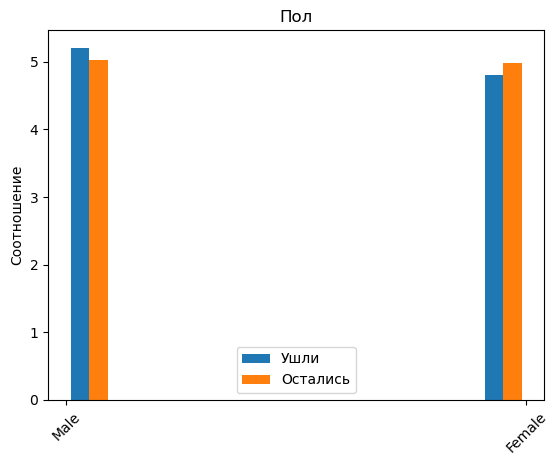

In [33]:
# Construir gr√°ficos comparativos

plot_histogram_comparison(gone_data['gender'], remaining_data['gender'], ['–£—à–ª–∏', '–û—Å—Ç–∞–ª–∏—Å—å'], '–ü–æ–ª')

# Lo marcar√© si encuentro un patr√≥n. 
# No hay ning√∫n patr√≥n

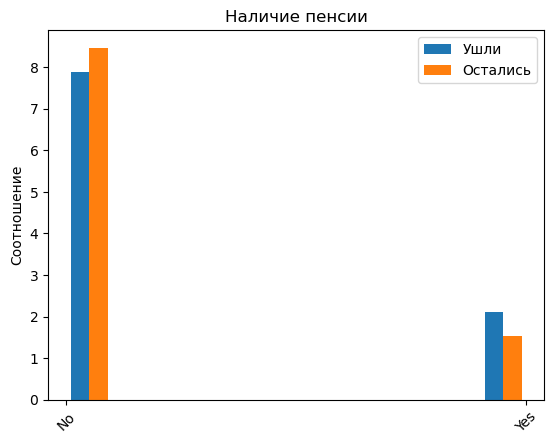

In [34]:
plot_histogram_comparison(gone_data['SeniorCitizen'], remaining_data['SeniorCitizen'], ['–£—à–ª–∏', '–û—Å—Ç–∞–ª–∏—Å—å'], '–ù–∞–ª–∏—á–∏–µ –ø–µ–Ω—Å–∏–∏')

# Un poco m√°s a menudo los jubilados salen

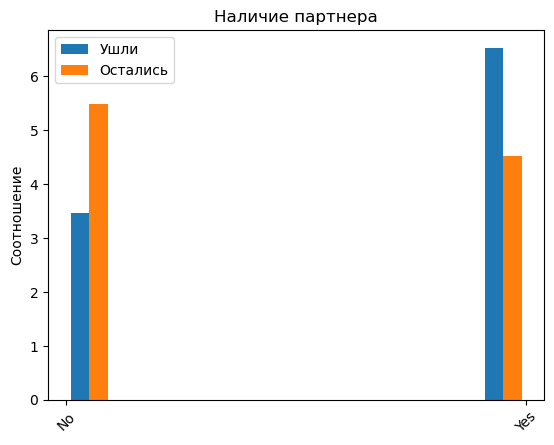

In [35]:
plot_histogram_comparison(gone_data['Partner'], remaining_data['Partner'], ['–£—à–ª–∏', '–û—Å—Ç–∞–ª–∏—Å—å'], '–ù–∞–ª–∏—á–∏–µ –ø–∞—Ä—Ç–Ω–µ—Ä–∞')

# La mayor√≠a de la gente se va en pares

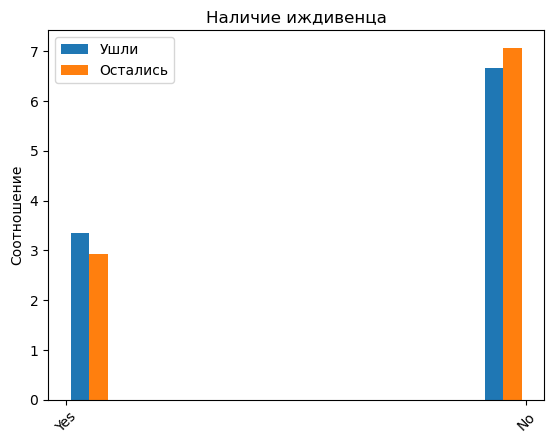

In [36]:
plot_histogram_comparison(gone_data['Dependents'], remaining_data['Dependents'], ['–£—à–ª–∏', '–û—Å—Ç–∞–ª–∏—Å—å'], '–ù–∞–ª–∏—á–∏–µ –∏–∂–¥–∏–≤–µ–Ω—Ü–∞')

# Tener un hijo no afecta el cuidado

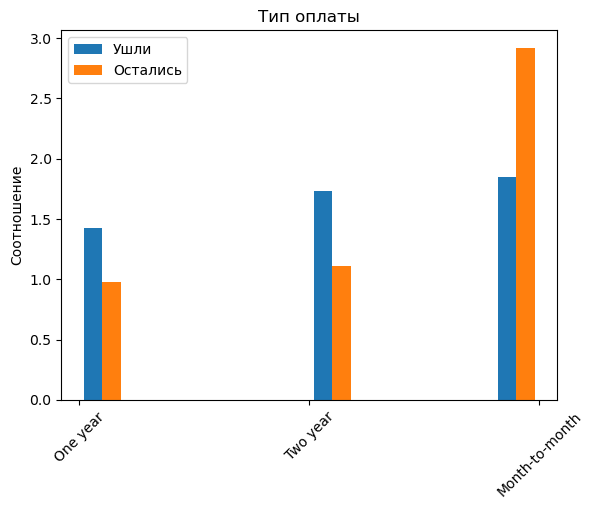

In [37]:
plot_histogram_comparison(gone_data['Type'], remaining_data['Type'], ['–£—à–ª–∏', '–û—Å—Ç–∞–ª–∏—Å—å'], '–¢–∏–ø –æ–ø–ª–∞—Ç—ã')

# Los que tienen contratos de 1 y 2 a√±os se van m√°s a menudo. Los clientes con pago mensual permanecen.

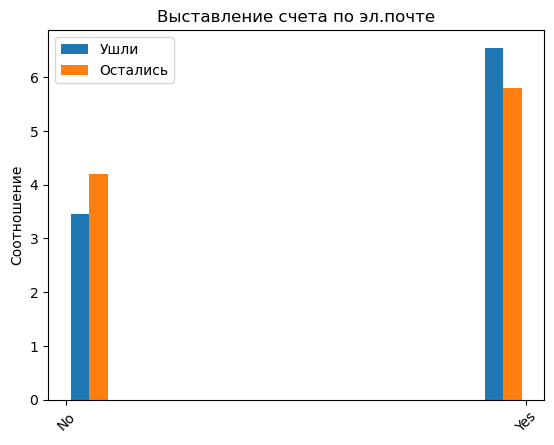

In [38]:
plot_histogram_comparison(gone_data['PaperlessBilling'], remaining_data['PaperlessBilling'], ['–£—à–ª–∏', '–û—Å—Ç–∞–ª–∏—Å—å'], '–í—ã—Å—Ç–∞–≤–ª–µ–Ω–∏–µ —Å—á–µ—Ç–∞ –ø–æ —ç–ª.–ø–æ—á—Ç–µ')

# Hay poca diferencia

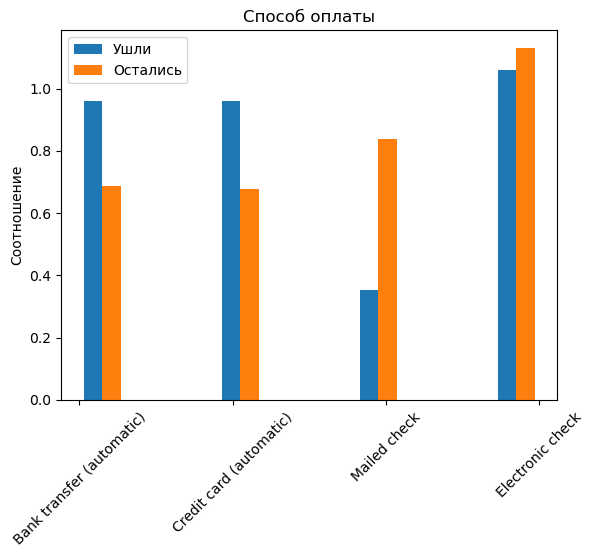

In [39]:
plot_histogram_comparison(gone_data['PaymentMethod'], remaining_data['PaymentMethod'], ['–£—à–ª–∏', '–û—Å—Ç–∞–ª–∏—Å—å'], '–°–ø–æ—Å–æ–± –æ–ø–ª–∞—Ç—ã')

# Un poco m√°s a menudo los clientes se van con el pago a trav√©s del banco y la tarjeta de cr√©dito. Los clientes con un cheque postal en su mayor√≠a permanecen.

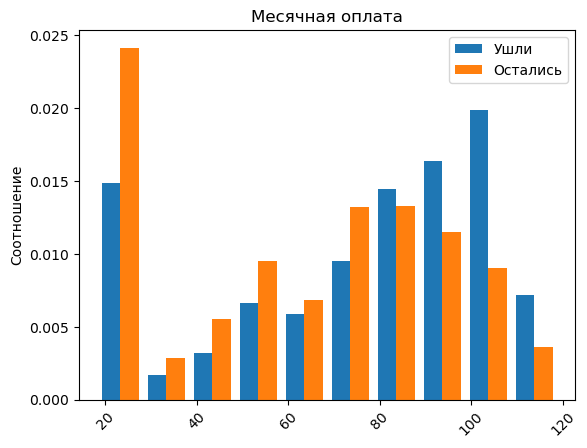

In [40]:
plot_histogram_comparison(gone_data['MonthlyCharges'], remaining_data['MonthlyCharges'], ['–£—à–ª–∏', '–û—Å—Ç–∞–ª–∏—Å—å'], '–ú–µ—Å—è—á–Ω–∞—è –æ–ø–ª–∞—Ç–∞')

# Aqu√≠ vemos que los que pagan por encima de 80 se van. Y la mayor diferencia son los que pagan 100.

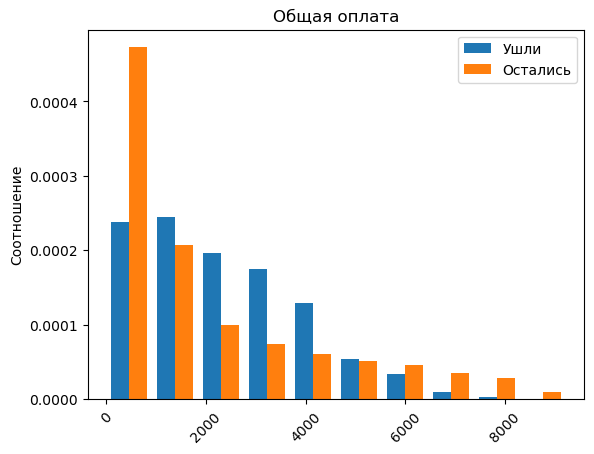

In [41]:
plot_histogram_comparison(gone_data['TotalCharges'], remaining_data['TotalCharges'], ['–£—à–ª–∏', '–û—Å—Ç–∞–ª–∏—Å—å'], '–û–±—â–∞—è –æ–ø–ª–∞—Ç–∞')

# Aqu√≠ vemos que los que pagaron incluso menos de 1000 no se van (nuevos clientes), los que ya han pagado m√°s de 5000
# tampoco deja de fumar - estos ya son clientes leales. El principal riesgo entre 1000 - 5000.

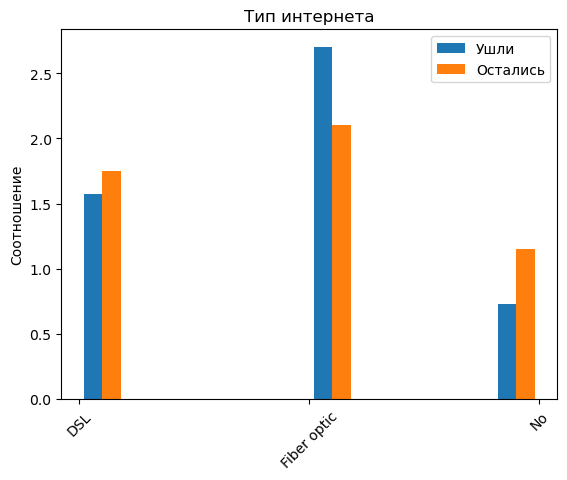

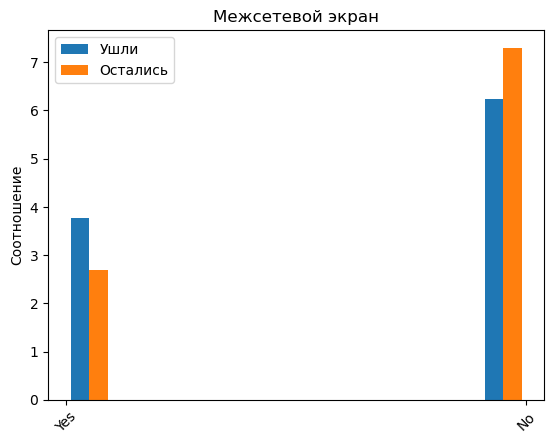

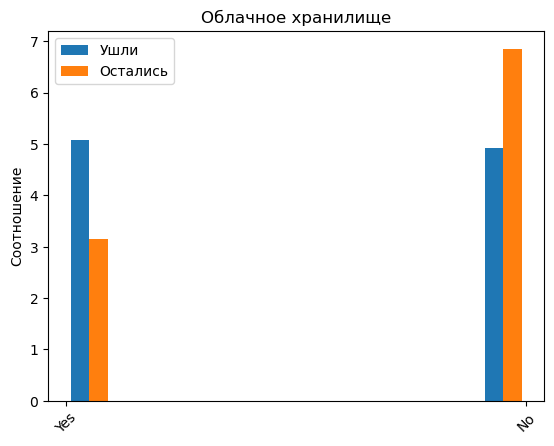

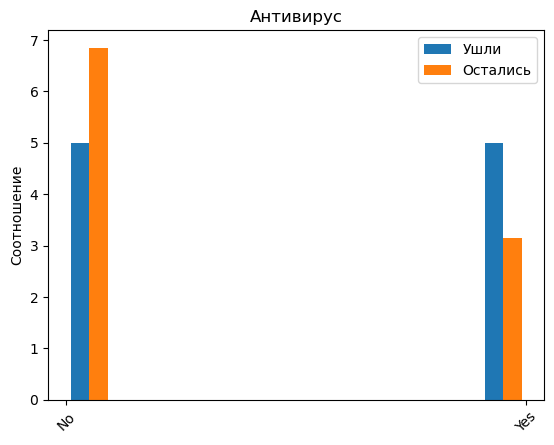

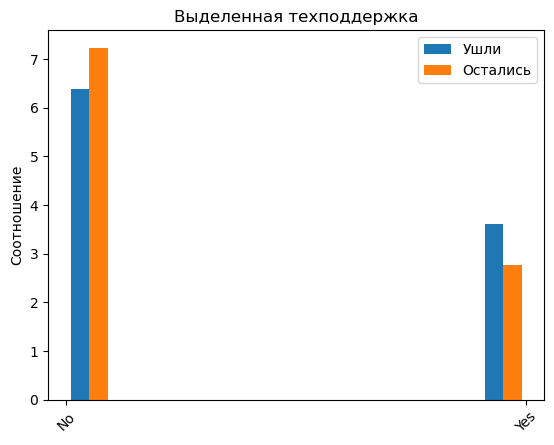

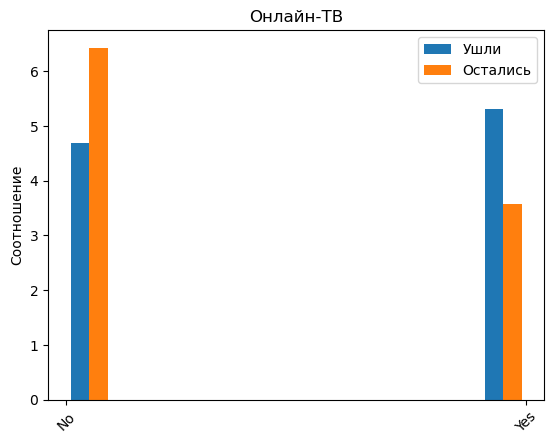

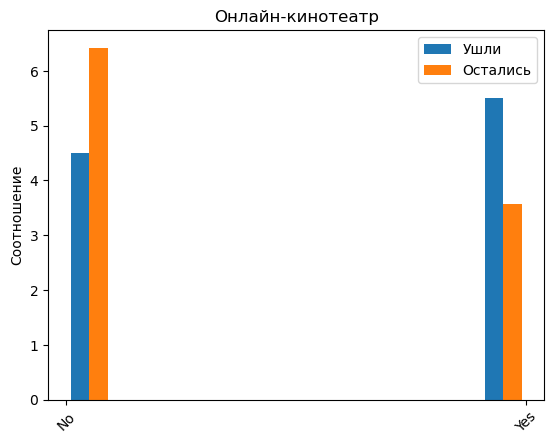

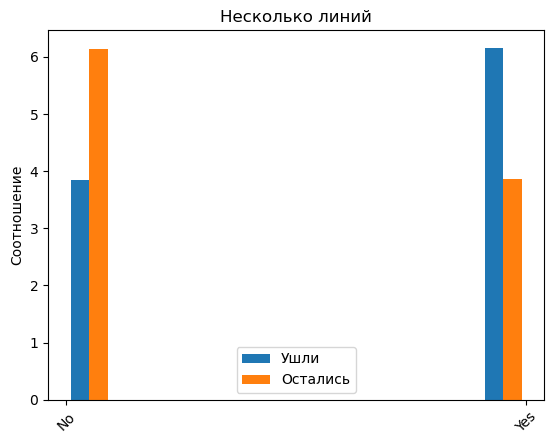

In [42]:
plot_histogram_comparison(gone_data['InternetService'], remaining_data['InternetService'], ['–£—à–ª–∏', '–û—Å—Ç–∞–ª–∏—Å—å'], '–¢–∏–ø –∏–Ω—Ç–µ—Ä–Ω–µ—Ç–∞')

plot_histogram_comparison(gone_data['OnlineSecurity'], remaining_data['OnlineSecurity'], ['–£—à–ª–∏', '–û—Å—Ç–∞–ª–∏—Å—å'], '–ú–µ–∂—Å–µ—Ç–µ–≤–æ–π —ç–∫—Ä–∞–Ω')

plot_histogram_comparison(gone_data['OnlineBackup'], remaining_data['OnlineBackup'], ['–£—à–ª–∏', '–û—Å—Ç–∞–ª–∏—Å—å'], '–û–±–ª–∞—á–Ω–æ–µ —Ö—Ä–∞–Ω–∏–ª–∏—â–µ')

plot_histogram_comparison(gone_data['DeviceProtection'], remaining_data['DeviceProtection'], ['–£—à–ª–∏', '–û—Å—Ç–∞–ª–∏—Å—å'], '–ê–Ω—Ç–∏–≤–∏—Ä—É—Å')

plot_histogram_comparison(gone_data['TechSupport'], remaining_data['TechSupport'], ['–£—à–ª–∏', '–û—Å—Ç–∞–ª–∏—Å—å'], '–í—ã–¥–µ–ª–µ–Ω–Ω–∞—è —Ç–µ—Ö–ø–æ–¥–¥–µ—Ä–∂–∫–∞')

plot_histogram_comparison(gone_data['StreamingTV'], remaining_data['StreamingTV'], ['–£—à–ª–∏', '–û—Å—Ç–∞–ª–∏—Å—å'], '–û–Ω–ª–∞–π–Ω-–¢–í')

plot_histogram_comparison(gone_data['StreamingMovies'], remaining_data['StreamingMovies'], ['–£—à–ª–∏', '–û—Å—Ç–∞–ª–∏—Å—å'], '–û–Ω–ª–∞–π–Ω-–∫–∏–Ω–æ—Ç–µ–∞—Ç—Ä')

plot_histogram_comparison(gone_data['MultipleLines'], remaining_data['MultipleLines'], ['–£—à–ª–∏', '–û—Å—Ç–∞–ª–∏—Å—å'], '–ù–µ—Å–∫–æ–ª—å–∫–æ –ª–∏–Ω–∏–π')

La distribuci√≥n del servicio se combin√≥ en un solo bloque.  
La diferencia entre ellos parece insignificante, pero si lo considera, m√°s a menudo se van: clientes con fibra √≥ptica y firewall conectado, almacenamiento en la nube, antivirus, soporte dedicado, TV en l√≠nea, cine en l√≠nea, varias l√≠neas. Ej. cualquiera de los servicios conectados aumenta el riesgo de que el cliente se vaya.

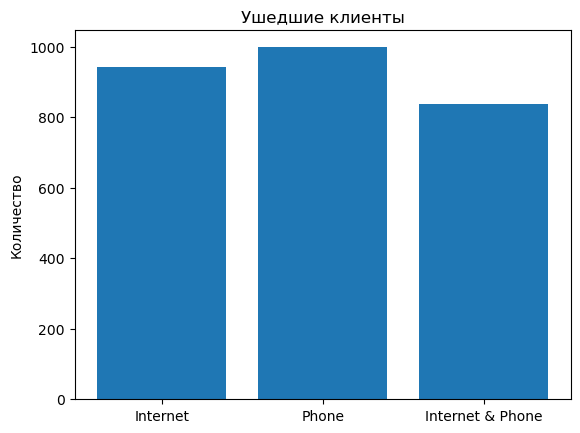

In [43]:
# Pens√© en ello, y decidi√≥ agregar un histograma que compara a los clientes que se fueron por tipo de servicio.

def plot_histogram_gone(data, labels, title):
    plt.bar(labels, data)
    plt.title(title)
    plt.xlabel('')
    plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ')
    plt.show()

filtered_data = data[data['Gone'] == 1]
internet_yes_count = filtered_data[filtered_data['Internet'] == 'Yes'].shape[0]
phone_yes_count = filtered_data[filtered_data['Phone'] == 'Yes'].shape[0]
internet_phone_yes_count = filtered_data[(filtered_data['Internet'] == 'Yes') & (filtered_data['Phone'] == 'Yes')].shape[0]

plot_histogram_gone([internet_yes_count, phone_yes_count, internet_phone_yes_count],
                          ['Internet', 'Phone', 'Internet & Phone'], '–£—à–µ–¥—à–∏–µ –∫–ª–∏–µ–Ω—Ç—ã')

### Conclusiones preliminares

Vamos a recoger conclusiones preliminares antes de entrenar el modelo.  
- Combinamos cuatro datacets en uno basado en el ID del cliente correspondiente
- Tipos de datos cambiados (dos columnas conduc√≠an a fechas), una an√°loga a las otras al texto, una opuesta a num√©rica.
- A√±adidas caracter√≠sticas de columna (tipo de cliente de Internet/ tel√©fono), columna con el n√∫mero de meses, cu√°ntos clientes en la empresa, y tambi√©n a√±adi√≥ la columna de destino - los clientes que se han ido
- Histogramas y cajas construidas con bigotes para observar la distribuci√≥n de caracter√≠sticas
- En el pago vimos que la mayor√≠a de los clientes gastan de 35 a 89 al mes. En los gastos totales de 450 a 3300. Hay emisiones por encima de 8000, pero estos son clientes leales que han estado utilizando el servicio desde el principio.
- En el grupo de riesgos preliminares, que dejan m√°s a menudo: pensionistas, personas en una pareja, los que concluyeron contratos anuales y de dos a√±os, pagados a trav√©s del banco y la tarjeta de cr√©dito. Para los pagos de grupos de riesgo, los que pagan m√°s de 80 por mes, y para todo el plazo del cliente pagado de 1000 a 5000.
- Tambi√©n se constat√≥ que cualquiera de los servicios adicionales conectados son pocos, pero aumentan el riesgo de abandono del cliente.
- Hay un poco m√°s de personas que utilizan los servicios telef√≥nicos solo entre los clientes que se fueron.

### Entrenamiento y pasos de control del modelo

Los datos est√°n listos para su an√°lisis y est√°n previstas las siguientes acciones:
    
1. Eliminar columnas que no necesitamos (p. ej., inicio y fin del contrato)
2. Dividir el conjunto de datos en muestras de entrenamiento y de ensayo en una proporci√≥n de 3 a 1
3. Codificar caracter√≠sticas categ√≥ricas con codificaci√≥n en caliente
4. Seleccionar hiperpar√°metros (planificar con GridSearch)
5. Si hay un desequilibrio, realice el equilibrio (por ejemplo, con class_weight)
6. Aprenda y compare dos modelos sobre validaci√≥n cruzada (plan RandomForestClassifier y CatBoost)
7. Elija el mejor modelo de validaci√≥n cruzada
8. Compruebe el mejor modelo en la muestra de prueba
9. Visualizar resultados, construir gr√°fico ROC
10. Interpretar la precisi√≥n para el cliente

## Formaci√≥n modelo

### Quitar caracter√≠sticas superfluas

In [44]:
# Antes de quitar las columnas que no necesitamos.
# Esta es la columna Fechas y la columna de Internet - porque el uso de Internet duplica 
# Columna del servicio de Internet (No - Internet no estaba conectado)
# Para no eliminar columnas sin trazas, gu√°rdelas en una tabla separada

new_data = data[['BeginDate', 'EndDate', 'Internet']].copy()

# Eliminar columnas de la tabla de origen
data.drop(['BeginDate', 'EndDate', 'Internet'], axis=1, inplace=True)

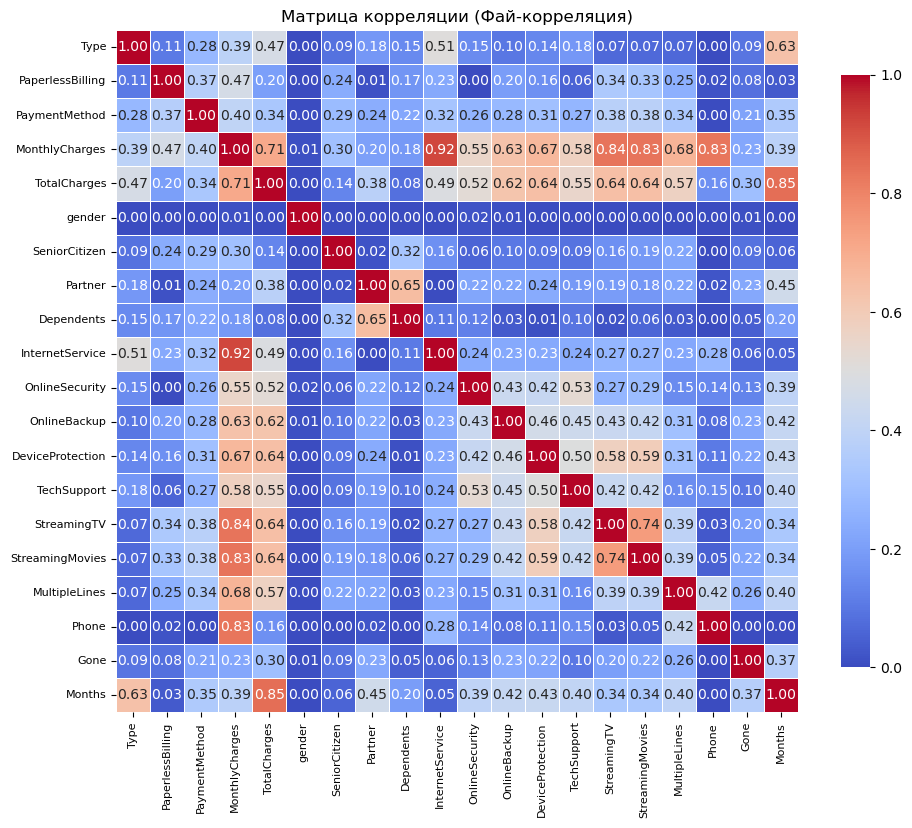

In [45]:
# Cree una matriz de correlaci√≥n usando la herramienta phik para ver qu√© caracter√≠sticas a√∫n se pueden eliminar.
# Eliminar rasgos num√©ricos 'MonthlyCharges', 'TotalCharges' y 'Meses'

interval_cols = ['MonthlyCharges', 'TotalCharges', 'Months']
phik_matrix = data.phik_matrix(interval_cols=interval_cols)

# Crear mapa t√©rmico de la matriz de correlaci√≥n
plt.figure(figsize=(11, 11))
sns.heatmap(phik_matrix, annot=True, cmap='coolwarm', square=True, fmt=".2f", linewidths=0.5, cbar=True, cbar_kws={'shrink': 0.7})
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title('–ú–∞—Ç—Ä–∏—Ü–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ (–§–∞–π-–∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è)')
plt.show()

In [46]:
# Eliminar las siguientes caracter√≠sticas tambi√©n (la lista fue determinada por largos ensayos y errores hasta que se obtuvo el rocauc necesario)

new_data = new_data.assign(Phone=data['Phone'],
                           InternetService=data['InternetService'],
                           TotalCharges=data['TotalCharges'],
                           )

# Para eliminar columnas de la tabla de origen
data.drop(['Phone', 'InternetService', 'TotalCharges'], axis=1, inplace=True)

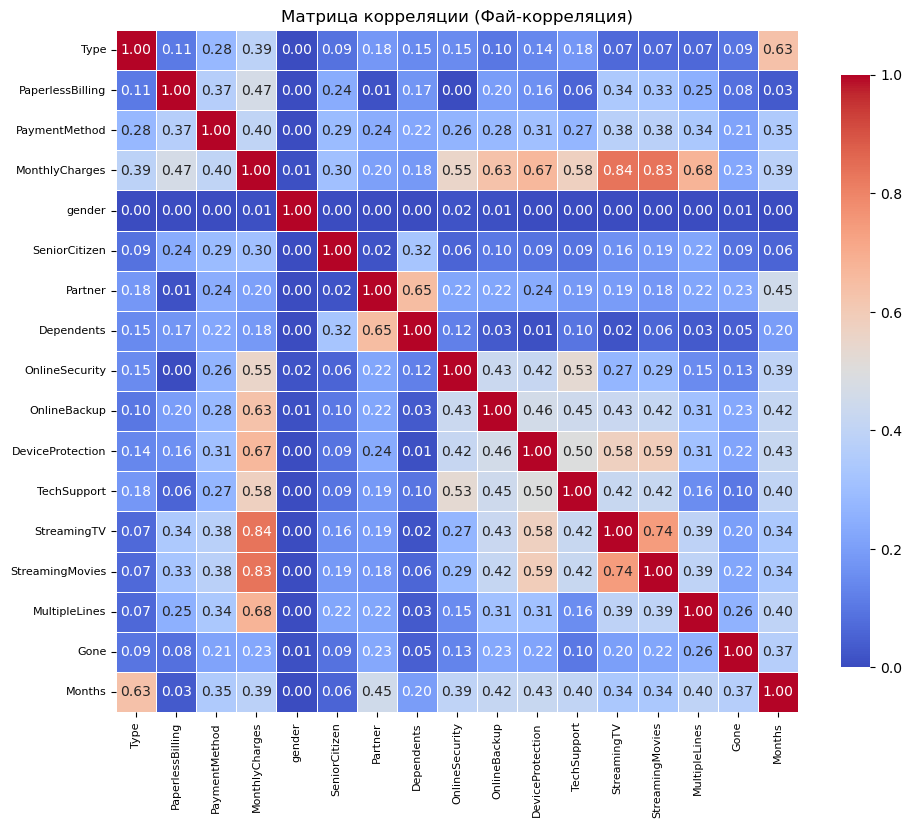

In [47]:
interval_cols = ['MonthlyCharges', 'Months']
phik_matrix = data.phik_matrix(interval_cols=interval_cols)

# Crear mapa t√©rmico de la matriz de correlaci√≥n
plt.figure(figsize=(11, 11))
sns.heatmap(phik_matrix, annot=True, cmap='coolwarm', square=True, fmt=".2f", linewidths=0.5, cbar=True, cbar_kws={'shrink': 0.7})
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title('–ú–∞—Ç—Ä–∏—Ü–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ (–§–∞–π-–∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è)')
plt.show()

### Muestreo

In [48]:
RANDOM_STATE = 60623

In [49]:
X = data.drop('Gone', axis=1)
y = data['Gone']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE, stratify=y)

print("–†–∞–∑–º–µ—Ä —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏:", X_train.shape, y_train.shape)
print("–†–∞–∑–º–µ—Ä —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏:", X_test.shape, y_test.shape)

–†–∞–∑–º–µ—Ä —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏: (5282, 16) (5282,)
–†–∞–∑–º–µ—Ä —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏: (1761, 16) (1761,)


In [50]:
# Compare el balance de clases en las muestras objetivo, debe ser aproximadamente el mismo para una evaluaci√≥n m√°s objetiva del modelo
print(y.mean())
print(y_train.mean())
print(y_test.mean())

0.15632542950447254
0.1563801590306702
0.15616127200454288


### CatBoost

In [51]:
%%time

# Dado que CatBoost en s√≠ puede codificar caracter√≠sticas categ√≥ricas, vamos a empezar con √©l.
# Definici√≥n de caracter√≠sticas y variable de destino

exclude_features = ['MonthlyCharges', 'Months']
features = [feat for feat in X_train.columns if feat not in exclude_features]

model_cbc = CatBoostClassifier(random_state=RANDOM_STATE, cat_features=features, verbose=0, 
                               auto_class_weights='Balanced', eval_metric='AUC', early_stopping_rounds=10)

param_grid_cbc = {
    'learning_rate': [0.001, 0.01, 0.1, 1.0 ],
    'max_depth': range(2, 6),
    'n_estimators': range(1800, 2201, 100)
}

grid_search_cbc = GridSearchCV(estimator=model_cbc, param_grid=param_grid_cbc, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_cbc.fit(X_train, y_train)

best_model_cbc = grid_search_cbc.best_estimator_

print("–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã: ", grid_search_cbc.best_params_)
print("–õ—É—á—à–∏–π ROC AUC: ", grid_search_cbc.best_score_)

–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:  {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 1900}
–õ—É—á—à–∏–π ROC AUC:  0.8262104054082513
CPU times: user 10 s, sys: 4.48 s, total: 14.5 s
Wall time: 9min 28s


### Codificaci√≥n de caracter√≠sticas para el modelo "de madera"

In [101]:
columns_to_exclude = ['MonthlyCharges', 'Months']

categorical_columns = [col for col in X_train.columns if col not in columns_to_exclude]

categorical_train = X_train[categorical_columns]
categorical_test = X_test[categorical_columns]

encoder = OrdinalEncoder()

encoded_train = encoder.fit_transform(categorical_train)
encoded_test = encoder.transform(categorical_test)

X_train_encoded = X_train.copy()
X_train_encoded[categorical_columns] = encoded_train

X_test_encoded = X_test.copy()
X_test_encoded[categorical_columns] = encoded_test

X_train_encoded.drop(columns=['MonthlyCharges', 'Months'], inplace=True)
X_test_encoded.drop(columns=['MonthlyCharges', 'Months'], inplace=True)

scaler = RobustScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[columns_to_exclude]), columns=columns_to_exclude, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test[columns_to_exclude]), columns=columns_to_exclude, index=X_test.index)

X_train_processed = pd.concat([X_train_encoded, X_train_scaled], axis=1)
X_test_processed = pd.concat([X_test_encoded, X_test_scaled], axis=1)

print(X_train_processed)
print(X_test_processed)

            Type  PaperlessBilling  PaymentMethod  gender  SeniorCitizen  \
customerID                                                                 
2788-CJQAQ   1.0               0.0            3.0     1.0            0.0   
0212-ISBBF   0.0               1.0            2.0     0.0            0.0   
4146-SVFUD   0.0               0.0            3.0     1.0            0.0   
6897-UUBNU   0.0               0.0            3.0     1.0            0.0   
1699-UOTXU   2.0               0.0            2.0     1.0            0.0   
...          ...               ...            ...     ...            ...   
5602-BVFMK   1.0               0.0            3.0     0.0            0.0   
3058-WQDRE   0.0               1.0            0.0     1.0            0.0   
3786-WOVKF   1.0               1.0            0.0     0.0            1.0   
6233-HXJMX   0.0               1.0            1.0     0.0            0.0   
3519-ZKXGG   0.0               1.0            2.0     0.0            0.0   

           

### RandomForestClassifier

In [102]:
%%time

model_rfc = RandomForestClassifier(random_state=RANDOM_STATE)

param_grid_rfc = {
    'n_estimators': range(50, 100, 2),
    'max_depth': range(2, 20, 2),
    'max_features': range(1, 15),
}

grid_search_rfc = GridSearchCV(model_rfc, param_grid_rfc, cv=5, scoring='roc_auc', n_jobs=-1)

grid_search_rfc.fit(X_train_processed, y_train)

best_model_rfc = grid_search_rfc.best_estimator_

y_pred_proba_train = best_model_rfc.predict_proba(X_train_processed)

roc_auc_train = roc_auc_score(y_train, y_pred_proba_train[:, 1])
print("ROC AUC –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ: {:.2f}".format(roc_auc_train))

print("–õ—É—á—à–∏–µ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã: ", grid_search_rfc.best_params_)

ROC AUC –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ: 0.93
–õ—É—á—à–∏–µ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã:  {'max_depth': 8, 'max_features': 8, 'n_estimators': 84}
CPU times: user 1min 35s, sys: 10.4 s, total: 1min 45s
Wall time: 12min 12s


### Las mejores pruebas de modelos

El RandomForestClassifier ha demostrado un mejor rendimiento, vamos a probarlo.

In [103]:
y_pred_proba_test = best_model_rfc.predict_proba(X_test_processed)

roc_auc_test = roc_auc_score(y_test, y_pred_proba_test[:, 1])
print("ROC AUC –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: {:.2f}".format(roc_auc_test))

ROC AUC –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: 0.86


¬°El umbral necesario de 0,85 se supera! Construyamos una curva ROC.

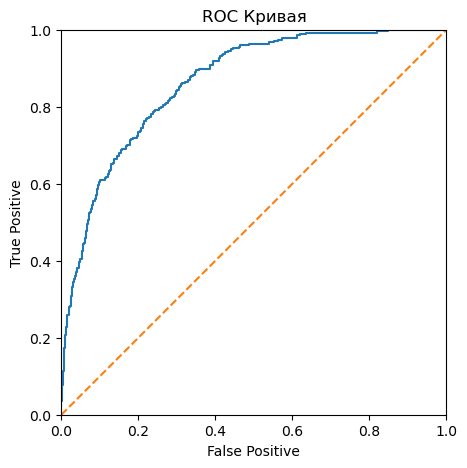

In [104]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_test[:, 1])
plt.figure(figsize=(11, 5))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.gca().set_aspect('equal')
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC –ö—Ä–∏–≤–∞—è')
plt.show()

### An√°lisis de precisi√≥n

In [105]:
y_pred_test = best_model_rfc.predict(X_test_processed)

accuracy_test = accuracy_score(y_test, y_pred_test)
print("Accuracy –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: {:.2f}".format(accuracy_test))

Accuracy –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: 0.87


Vemos que el modelo clasific√≥ correctamente el 87% de los ejemplos en la muestra de prueba.

### Matrix error

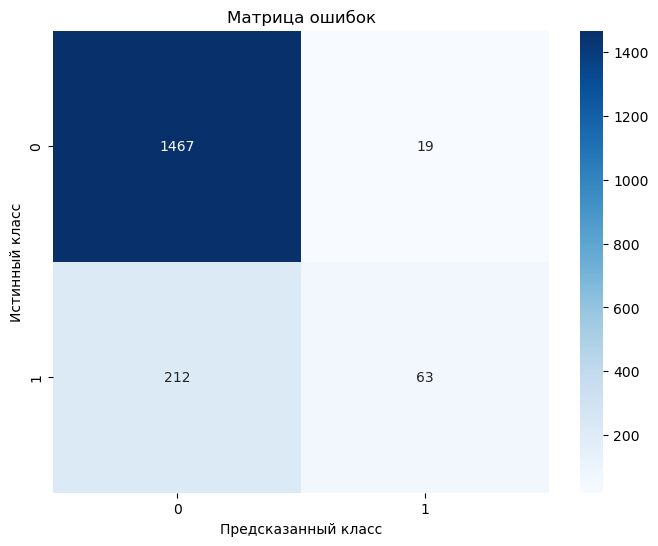

In [106]:
y_pred_test = best_model_rfc.predict(X_test_processed)

cm = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–π –∫–ª–∞—Å—Å')
plt.ylabel('–ò—Å—Ç–∏–Ω–Ω—ã–π –∫–ª–∞—Å—Å')
plt.title('–ú–∞—Ç—Ä–∏—Ü–∞ –æ—à–∏–±–æ–∫')
plt.show()

En la matriz de errores, se puede observar que el modelo predice correctamente los casos negativos (True Negative), lo que significa que clasifica correctamente los clientes que no salen.

### An√°lisis de importancia de caracter√≠sticas

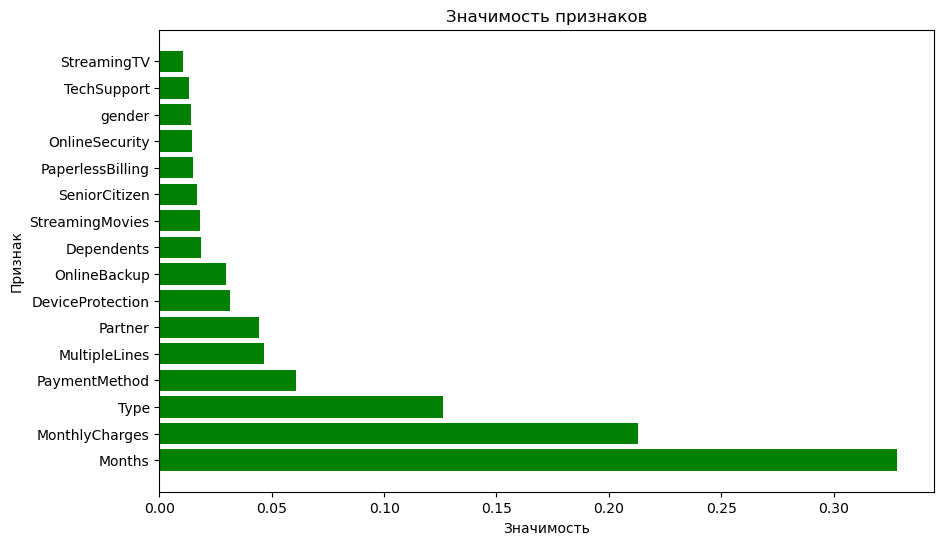

In [108]:
X_test_scaled_df = pd.DataFrame(X_test_processed, columns=X_test_processed.columns)

importances = grid_search_rfc.best_estimator_.feature_importances_
importances_df = pd.DataFrame(importances, index=X_test_scaled_df.columns, columns=['importance'])
importances_df = importances_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importances_df.index, importances_df['importance'], color='green')
plt.xlabel('–ó–Ω–∞—á–∏–º–æ—Å—Ç—å')
plt.ylabel('–ü—Ä–∏–∑–Ω–∞–∫')
plt.title('–ó–Ω–∞—á–∏–º–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤')
plt.show()

Vemos que el signo m√°s importante por el que los clientes se van: el n√∫mero de meses de uso de los servicios. Aproximadamente la mitad menos: el costo del pago mensual y el tipo de contrato (mensual o 1/2 a√±os). El resto de la evidencia en comparaci√≥n no es tan importante.

### Informe final

Qu√© elementos del plan se aplicaron y cu√°les no. ¬øPor qu√©?  
Echemos un vistazo al plan original.  
‚úÖ Eliminado las columnas que no necesit√°bamos - al final 6, 2 de los cuales fueron creados ellos mismos  
‚úÖ Dividi√≥ el conjunto de datos en muestras de entrenamiento y pruebas en la proporci√≥n de 3 a 1  
‚úÖ Funciones categ√≥ricas codificadas con One-Hot Encoding OrdinalEncoder y solo para el modelo RFC  
‚úÖ Hiperpar√°metros seleccionados con GridSearch para ambos modelos  
‚úÖ Equilibrio usado con peso de clase  
‚úÖ Aprenda y compare dos modelos en validaci√≥n cruzada (RandomForestClassifier y CatBoost)  
‚úÖ Eligi√≥ el mejor modelo de validaci√≥n cruzada  
‚úÖ Probado el mejor modelo en la muestra de prueba  
‚úÖ Resultados visualizados, gr√°fico ROC construido y matriz de errores  
‚úÖ Mayor precisi√≥n para el cliente
  
¬øQu√© dificultades han surgido y c√≥mo las han superado?  
La principal dificultad fue encontrar hiperpar√°metros para lograr la m√©trica roc-auc necesaria. En los datos primarios, Catbus mostr√≥ 0.83 en el tr√≠gono, y Randomles mostr√≥ 0.96 en el tr√≠gono, pero 0.81 en la prueba. Durante los experimentos, pasos como agregar equilibrio, agregar estratificaci√≥n al muestreo, revisar la lista de temas para aprender, extender la cuadr√≠cula de hiperpar√°metros, agregar estados aleatorios donde haya accidentes. Como resultado, mediante la revisi√≥n de la lista de caracter√≠sticas y la ampliaci√≥n de la cuadr√≠cula de hiperpar√°metros (basado en los mejores clasificados) fue posible lograr la m√©trica necesaria en uno de los modelos.
  
¬øCu√°les son los pasos clave para resolver el problema que usted destac√≥?
Era importante combinar las tablas correctamente, procesar los datos y rellenar los espacios en blanco. A continuaci√≥n, el elemento m√°s importante - es analizar las se√±ales y deshacerse de la basura. Despu√©s de ya empezar a entrenar modelos. Aqu√≠ es importante prestar atenci√≥n a la selecci√≥n de hiperpar√°metros y extender las cuadr√≠culas si los mejores est√°n en el borde.  
  
¬øQu√© caracter√≠sticas se utilizaron para entrenar el modelo y qu√© tratamiento previo de estas caracter√≠sticas se realiz√≥?
Todo original excepto 'BeginDate', 'EndDate', 'InternetService', 'TotalCharges' + agreg√≥ 'Meses' - el n√∫mero de meses que un cliente ha utilizado los servicios de la compa√±√≠a. De atributos guardados de 'SeniorCitizen' hemos traducido al texto (S√≠/ No), as√≠ como atascado No pasa por todas partes.
  
¬øCu√°l es su modelo final, cu√°les son sus hiperpar√°metros y cu√°l es su calidad?  
Como resultado, el RandomForestClassifier gan√≥. Mostr√≥ roc-auc 0.91 en la muestra de entrenamiento y 0.86 en la muestra de prueba. Precisi√≥n en este modelo 0.87. Asesoramos a su cliente üëç